<a href="https://colab.research.google.com/github/TXH2020/MainRepo/blob/main/Academics/Image%20Processing/Image_Processing3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-05c65fdae210>:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  im=rgb2gray(imread("triangle_circle.png"))
<ipython-input-1-05c65fdae210>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122),plt.plot((0,im.shape[1]),(y0,y1),'-r')


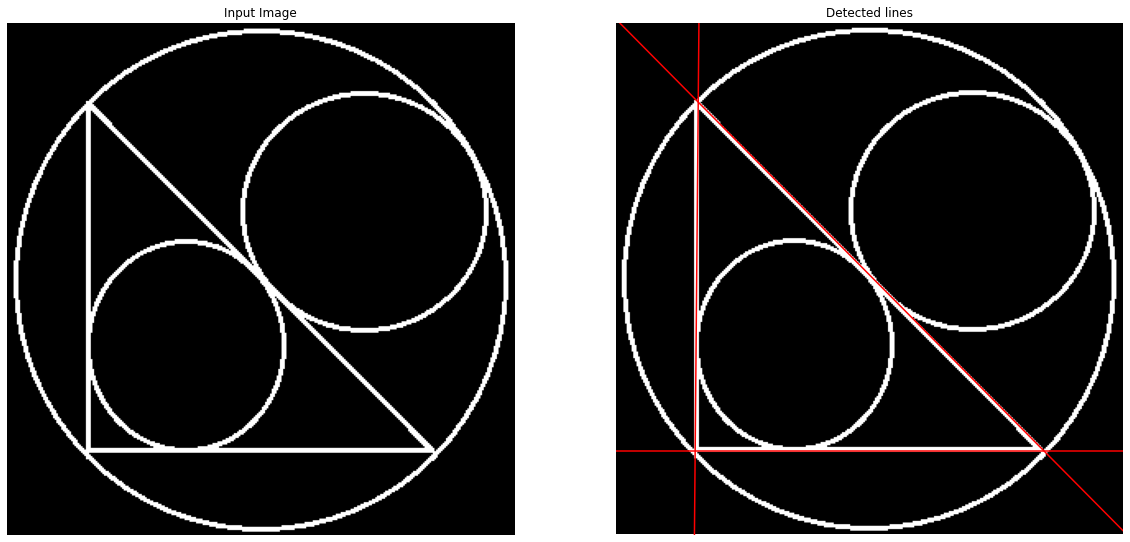

In [1]:
#Hough Transform
import urllib.request as ureq
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import hough_line, hough_line_peaks
import numpy as np
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/triangle_circle.png','triangle_circle.png')
im=rgb2gray(imread("triangle_circle.png"))
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(im,cmap=plt.cm.gray),plt.title("Input Image"),plt.axis('off')
h,t,d=hough_line(im)
plt.subplot(122),plt.imshow(im,cmap=plt.cm.gray)
for _,angle,dist in zip(*hough_line_peaks(h,t,d)):
  y0=(dist-0*np.cos(angle))/np.sin(angle)
  y1=(dist-im.shape[1]*np.cos(angle))/np.sin(angle)
  plt.subplot(122),plt.plot((0,im.shape[1]),(y0,y1),'-r')
plt.xlim((0, im.shape[1]))
plt.ylim((im.shape[0], 0))
plt.title("Detected lines")
plt.axis('off')
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f30b6fcdd90>,
 (-0.5, 676.5, 479.5, -0.5),
 Text(0.5, 1.0, 'Thresholded image'))

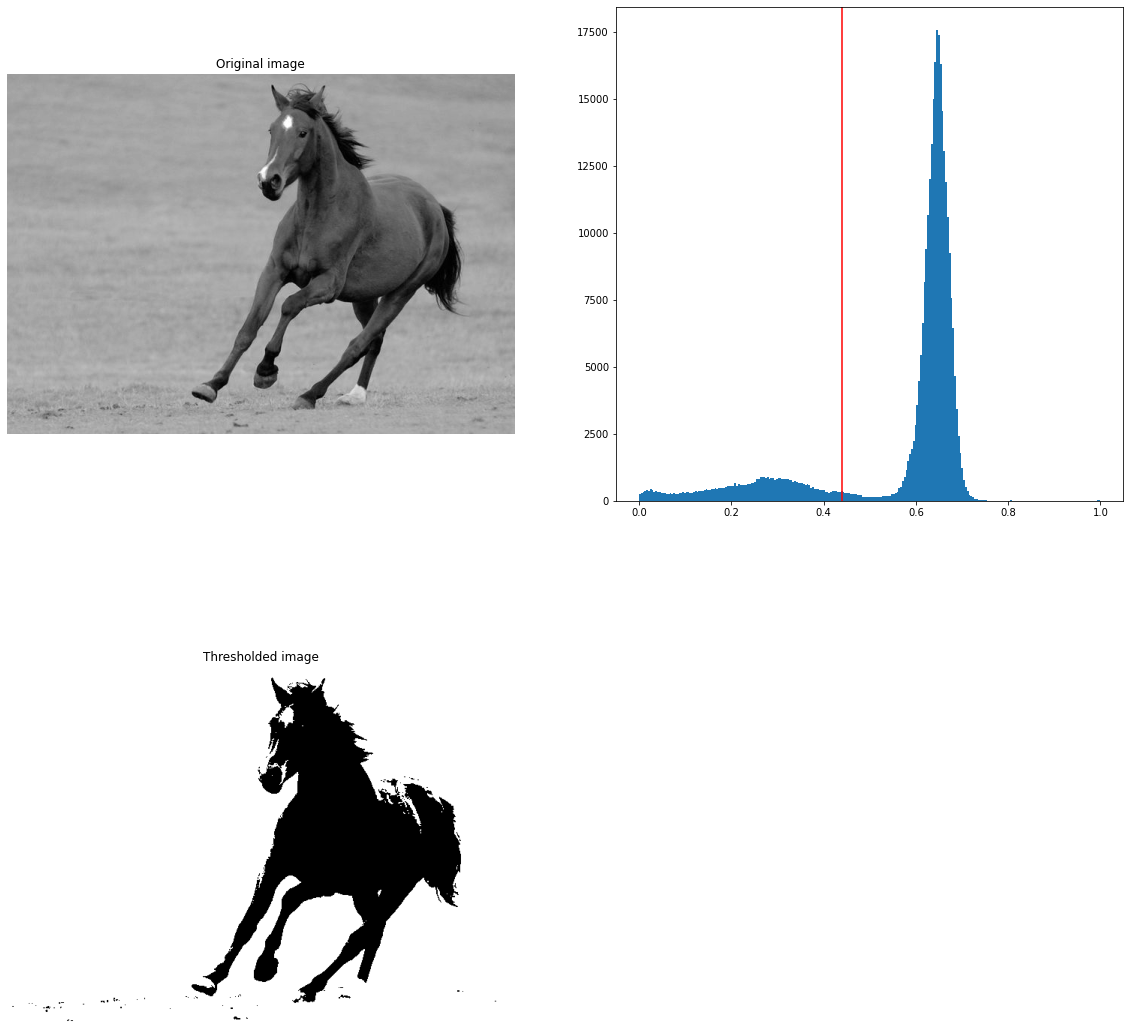

In [2]:
#Otsu thresholding Algorithm
from skimage.filters import threshold_otsu
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/horse.jpg','horse.jpg')
im=rgb2gray(imread("horse.jpg"))
plt.figure(figsize=(20,20))
plt.subplot(221),plt.imshow(im,cmap=plt.cm.gray),plt.axis('off'),plt.title("Original image")
threshold=threshold_otsu(im)
plt.subplot(222),plt.hist(im.ravel(),bins=256),plt.axvline(x=threshold,color='r')
im_n=im>threshold
plt.subplot(223),plt.imshow(im_n,cmap=plt.cm.gray),plt.axis('off'),plt.title("Thresholded image")

###Edge Based Segmentation

(<Figure size 720x720 with 1 Axes>,
 (-0.5, 383.5, 302.5, -0.5))

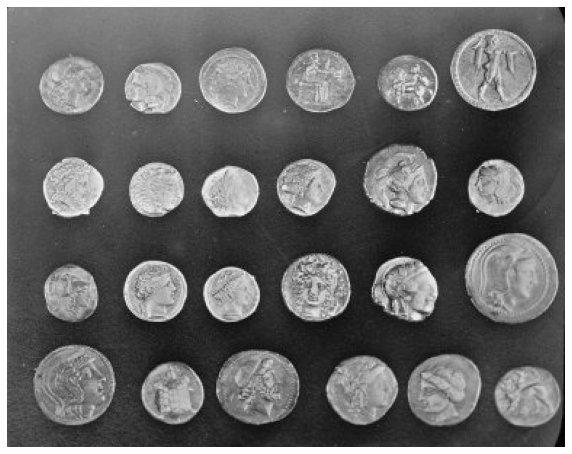

In [3]:
from skimage import data
coins=data.coins()
plt.figure(figsize=(10,10)),plt.imshow(coins,cmap=plt.cm.gray),plt.axis('off')

(<Figure size 720x720 with 1 Axes>,
 (-0.5, 383.5, 302.5, -0.5))

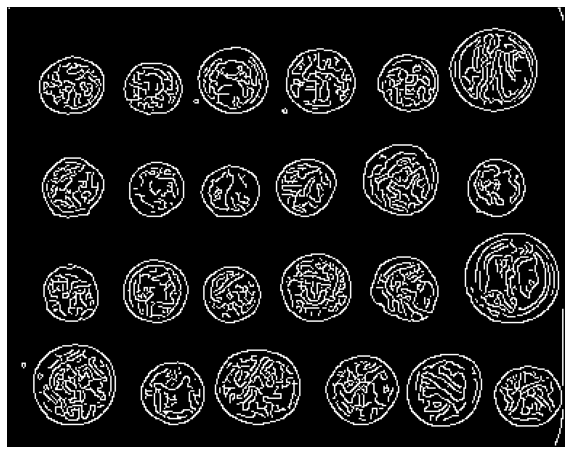

In [4]:
from skimage.feature import canny
edges=canny(coins)
plt.figure(figsize=(10,10)),plt.imshow(edges,cmap=plt.cm.gray),plt.axis('off')

(<Figure size 720x720 with 1 Axes>,
 (-0.5, 383.5, 302.5, -0.5))

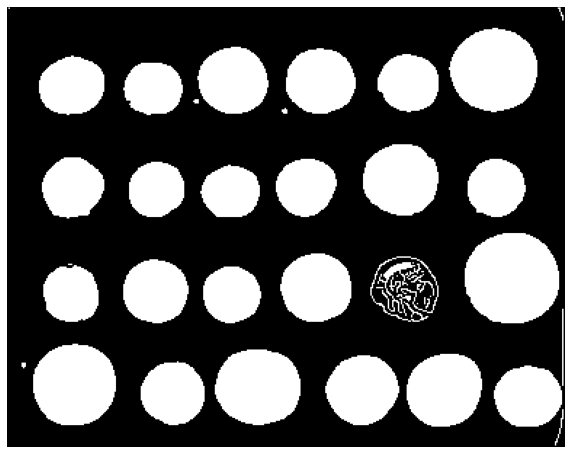

In [5]:
from scipy import ndimage
fill_holes=ndimage.binary_fill_holes(edges)
plt.figure(figsize=(10,10)),plt.imshow(fill_holes,cmap=plt.cm.gray),plt.axis('off')

(<Figure size 720x720 with 1 Axes>,
 (-0.5, 383.5, 302.5, -0.5))

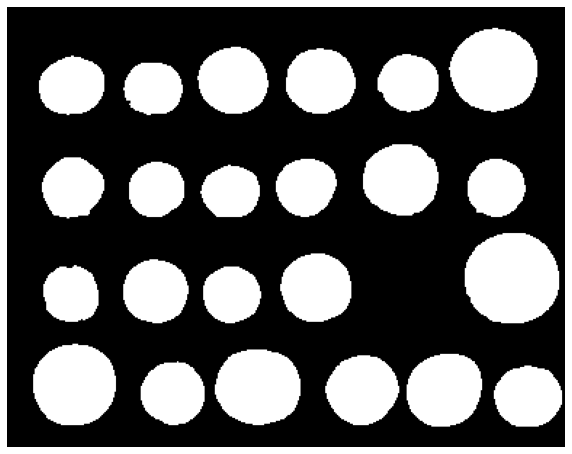

In [6]:
from skimage.morphology import remove_small_objects
final=remove_small_objects(fill_holes,min_size=150)
plt.figure(figsize=(10,10)),plt.imshow(final,cmap=plt.cm.gray),plt.axis('off')

###Morphological Watershed Algorithm

(<Figure size 720x720 with 1 Axes>,
 (-0.5, 383.5, 302.5, -0.5))

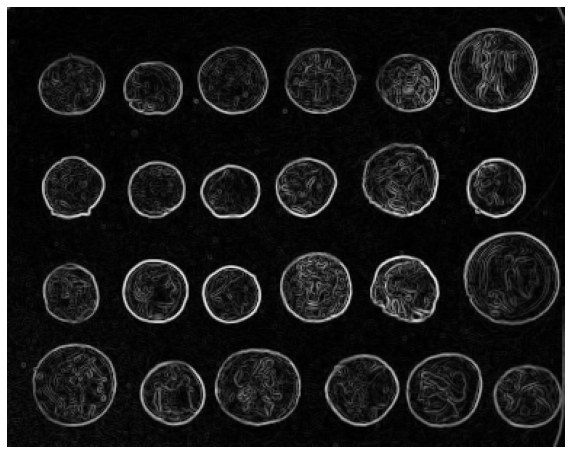

In [7]:
from skimage.filters import sobel
edges=sobel(coins)
plt.figure(figsize=(10,10)),plt.imshow(edges,cmap=plt.cm.gray),plt.axis('off')

(<Figure size 720x720 with 2 Axes>,
 (-0.5, 383.5, 302.5, -0.5))

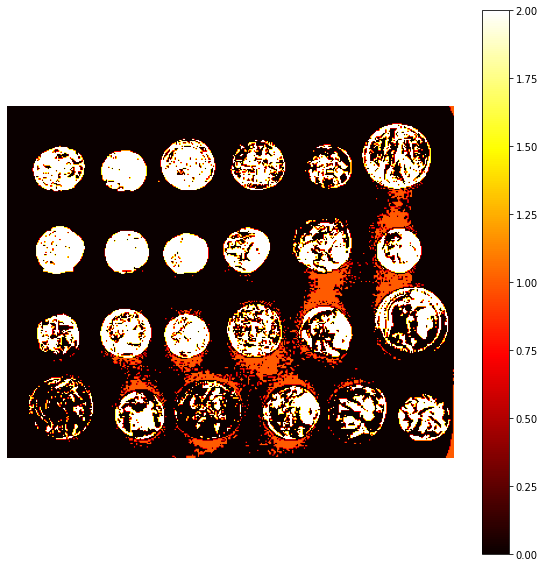

In [8]:
markers=np.zeros_like(coins)
markers[coins<30]=1
markers[coins>150]=2
plt.figure(figsize=(10,10)),plt.imshow(markers,cmap=plt.cm.hot),plt.colorbar(),plt.axis('off')

/usr/local/lib/python3.8/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


(<Figure size 720x720 with 1 Axes>,
 (-0.5, 383.5, 302.5, -0.5))

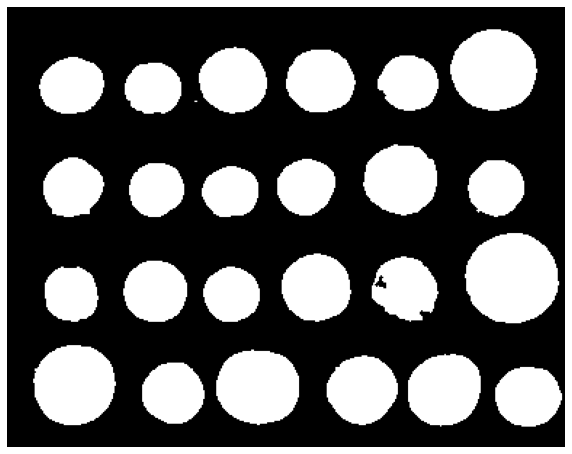

In [9]:
from skimage.morphology import watershed
final=watershed(edges,markers)
plt.figure(figsize=(10,10)),plt.imshow(final,cmap=plt.cm.gray),plt.axis('off')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f30b3884b50>,
 Text(0.5, 1.0, 'Dilated image'),
 (-0.5, 339.5, 339.5, -0.5))

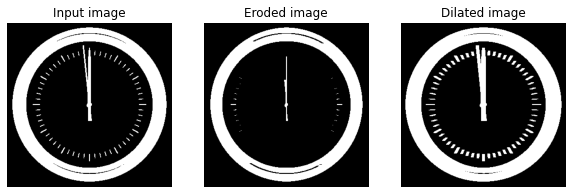

In [10]:
from skimage.morphology import binary_erosion,binary_dilation,rectangle,disk,binary_opening,binary_closing
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/clock2.jpg','clock.jpg')
im=rgb2gray(imread('clock.jpg'))
im[im<=0.5]=0
im[im>0.5]=1
eroded=binary_erosion(im,rectangle(1,5))
dilated=binary_dilation(im,rectangle(1,5))
plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(im,cmap=plt.cm.gray),plt.title('Input image'),plt.axis('off')
plt.subplot(132),plt.imshow(eroded,cmap=plt.cm.gray),plt.title('Eroded image'),plt.axis('off')
plt.subplot(133),plt.imshow(dilated,cmap=plt.cm.gray),plt.title('Dilated image'),plt.axis('off')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f30b37da250>,
 Text(0.5, 1.0, 'Closed image'),
 (-0.5, 339.5, 339.5, -0.5))

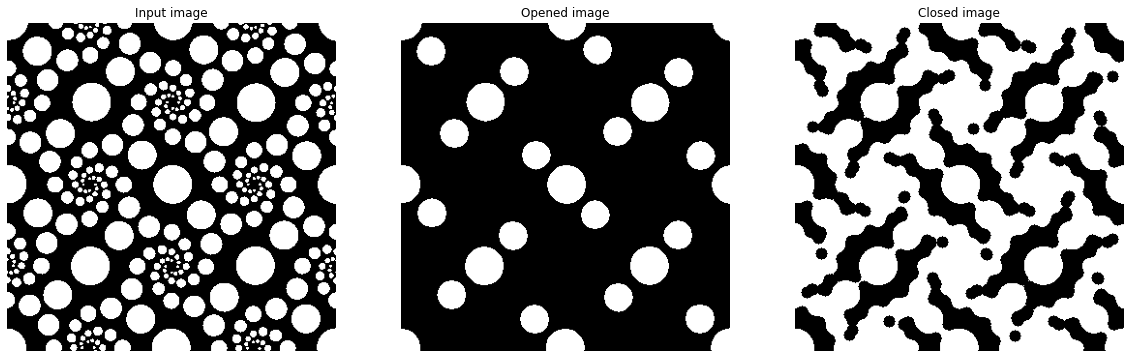

In [11]:
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/circles.jpg','circles.jpg')
im=rgb2gray(imread('circles.jpg'))
im[im<=0.5]=0
im[im>0.5]=1
opened=binary_opening(im,disk(12))
closed=binary_closing(im,disk(6))
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(im,cmap=plt.cm.gray),plt.title('Input image'),plt.axis('off')
plt.subplot(132),plt.imshow(opened,cmap=plt.cm.gray),plt.title('Opened image'),plt.axis('off')
plt.subplot(133),plt.imshow(closed,cmap=plt.cm.gray),plt.title('Closed image'),plt.axis('off')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f30b3724730>,
 Text(0.5, 1.0, 'Skeletonized image'),
 (-0.5, 784.5, 479.5, -0.5))

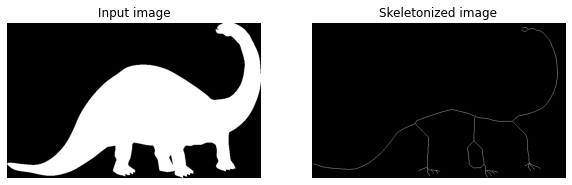

In [12]:
from skimage.morphology import skeletonize
from skimage import img_as_float
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/dynasaur.png','dynasaur.png')
im=img_as_float(imread('dynasaur.png')[...,3])
im[im<=0.5]=0
im[im>0.5]=1
skeleton=skeletonize(im)
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(im,cmap=plt.cm.gray),plt.title('Input image'),plt.axis('off')
plt.subplot(122),plt.imshow(skeleton,cmap=plt.cm.gray),plt.title('Skeletonized image'),plt.axis('off')

<ipython-input-13-c5911b44dfef>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im = im.astype(np.bool)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f30b364c8b0>,
 Text(0.5, 1.0, 'Difference image'),
 (-0.5, 339.5, 339.5, -0.5))

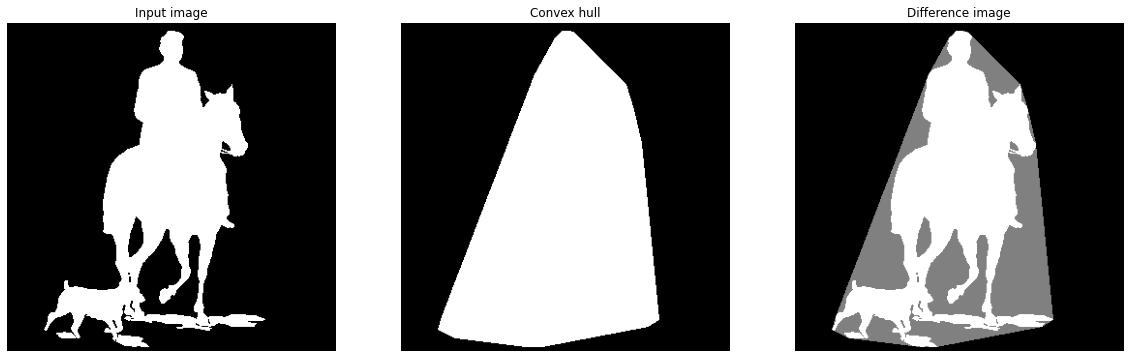

In [13]:
from skimage.morphology import convex_hull_image
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/horse-dog.jpg','horse-dog.jpg')
im=rgb2gray(imread('horse-dog.jpg'))
im[im <= 0.5] = 0 # convert to binary image
im[im > 0.5] = 1
chull = convex_hull_image(im)
im = im.astype(np.bool)
chull_diff = img_as_float(chull.copy())
chull_diff[im] = 2
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(im,cmap=plt.cm.gray),plt.title('Input image'),plt.axis('off')
plt.subplot(132),plt.imshow(chull,cmap=plt.cm.gray),plt.title('Convex hull'),plt.axis('off')
plt.subplot(133),plt.imshow(chull_diff,cmap=plt.cm.gray),plt.title('Difference image'),plt.axis('off')

<ipython-input-14-1861137f5a6e>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im = im.astype(np.bool)


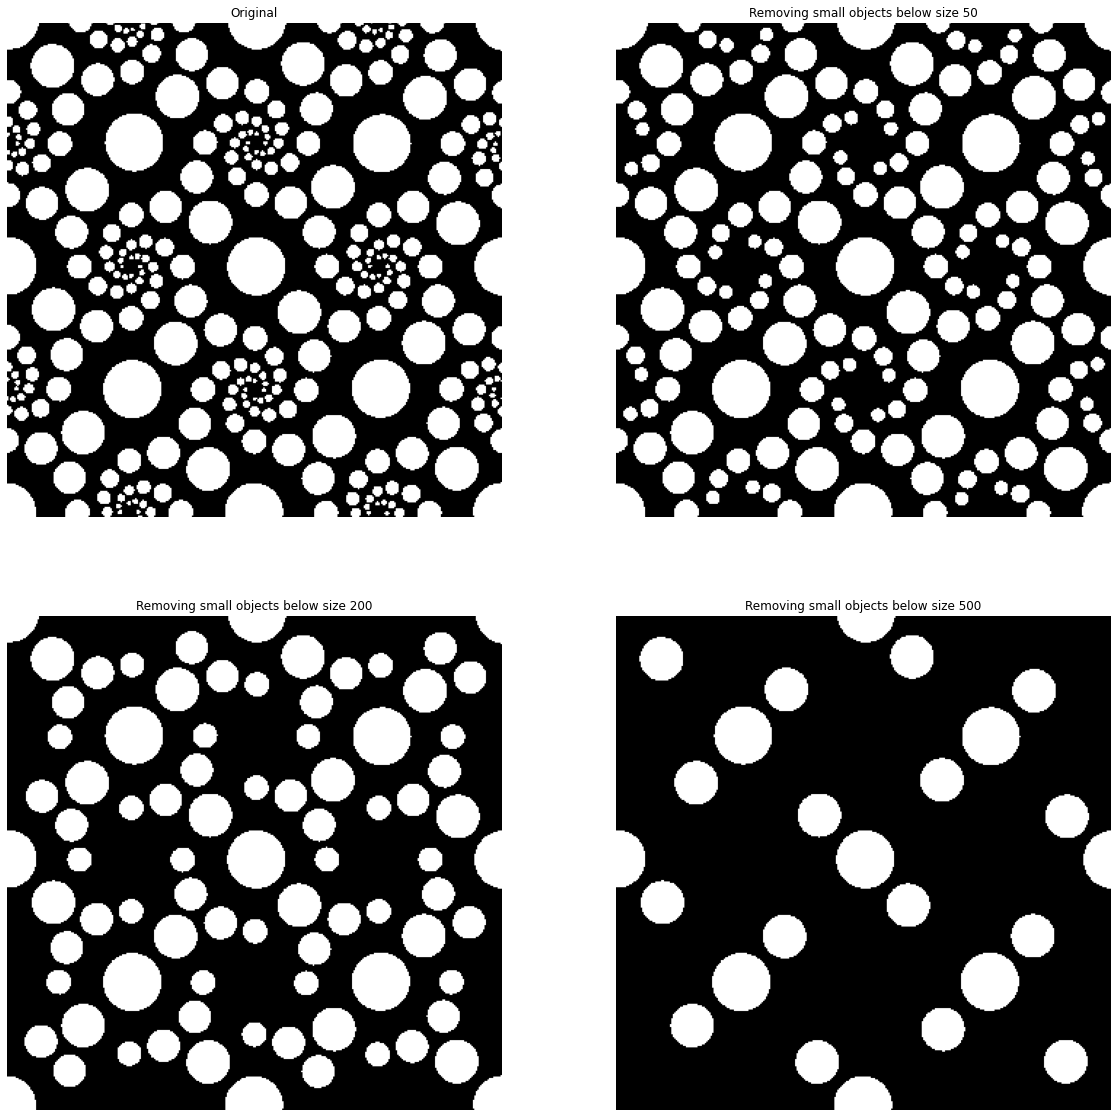

In [14]:
from skimage.morphology import remove_small_objects
im = rgb2gray(imread('circles.jpg'))
im[im > 0.5] = 1 # create binary image by thresholding with fixed threshold
im[im <= 0.5] = 0
im = im.astype(np.bool)
plt.figure(figsize=(20,20))
plt.subplot(2,2,1),plt.imshow(im,cmap=plt.cm.gray),plt.title('Original'),plt.axis('off')
i = 2
for osz in [50, 200, 500]:
    im1 = remove_small_objects(im, osz, connectivity=1)
    plt.subplot(2,2,i), plt.imshow(im1,plt.cm.gray),plt.title('Removing small objects below size ' + str(osz)),plt.axis('off')
    i += 1
plt.show()

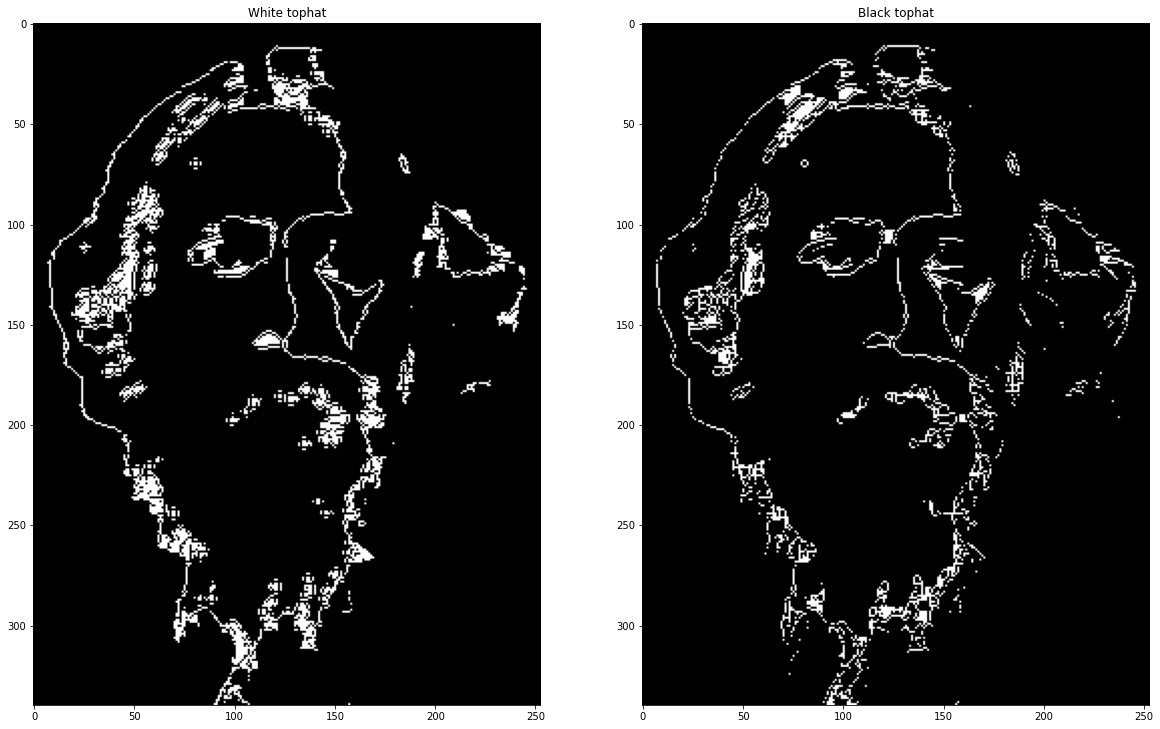

In [15]:
from skimage.morphology import white_tophat, black_tophat, square
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/tagore.png','tagore.png')
im = imread('tagore.png')[...,3]
im[im <= 0.5] = 0
im[im > 0.5] = 1
im1 = white_tophat(im, square(5))
im2 = black_tophat(im, square(5))
plt.figure(figsize=(20,15))
plt.subplot(1,2,1), plt.imshow(im1,plt.cm.gray),plt.title('White tophat')
plt.subplot(1,2,2), plt.imshow(im2,plt.cm.gray),plt.title('Black tophat')
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f30b33a3190>,
 Text(0.5, 1.0, 'Boundary 7 x 7'))

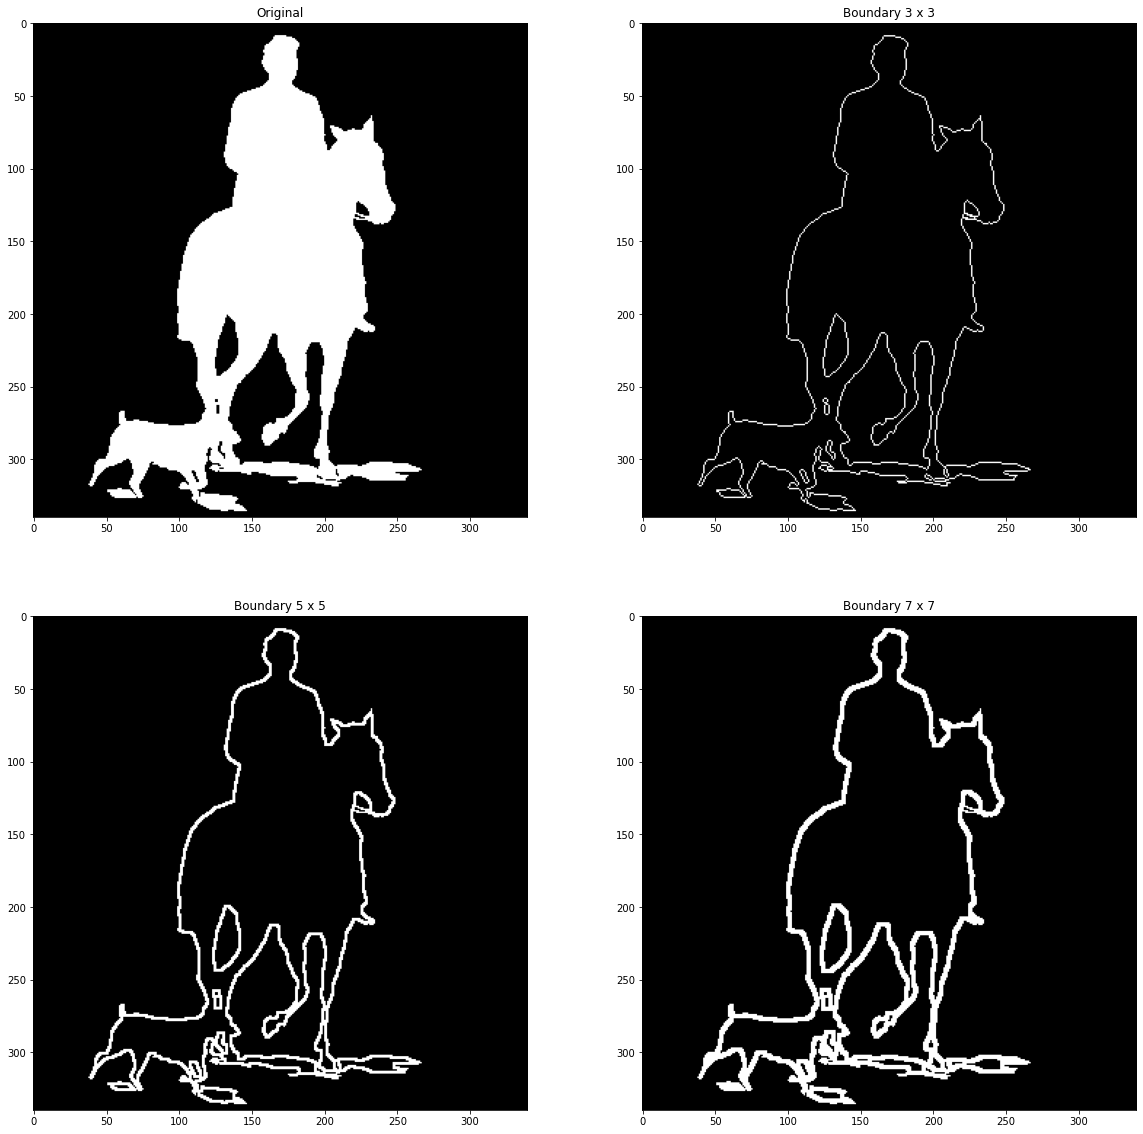

In [16]:
im=rgb2gray(imread('horse-dog.jpg'))
im[im <= 0.5] = 0 # convert to binary image
im[im > 0.5] = 1
boundary1 = im - binary_erosion(im)
boundary2 = im - binary_erosion(im, rectangle(5,5))
boundary3 = im - binary_erosion(im, rectangle(7,7))
plt.figure(figsize=(20,20))
plt.subplot(2,2,1), plt.imshow(im,plt.cm.gray), plt.title('Original')
plt.subplot(2,2,2), plt.imshow(boundary1,plt.cm.gray), plt.title('Boundary 3 x 3')
plt.subplot(2,2,3), plt.imshow(boundary2,plt.cm.gray), plt.title('Boundary 5 x 5')
plt.subplot(2,2,4), plt.imshow(boundary3,plt.cm.gray), plt.title('Boundary 7 x 7')

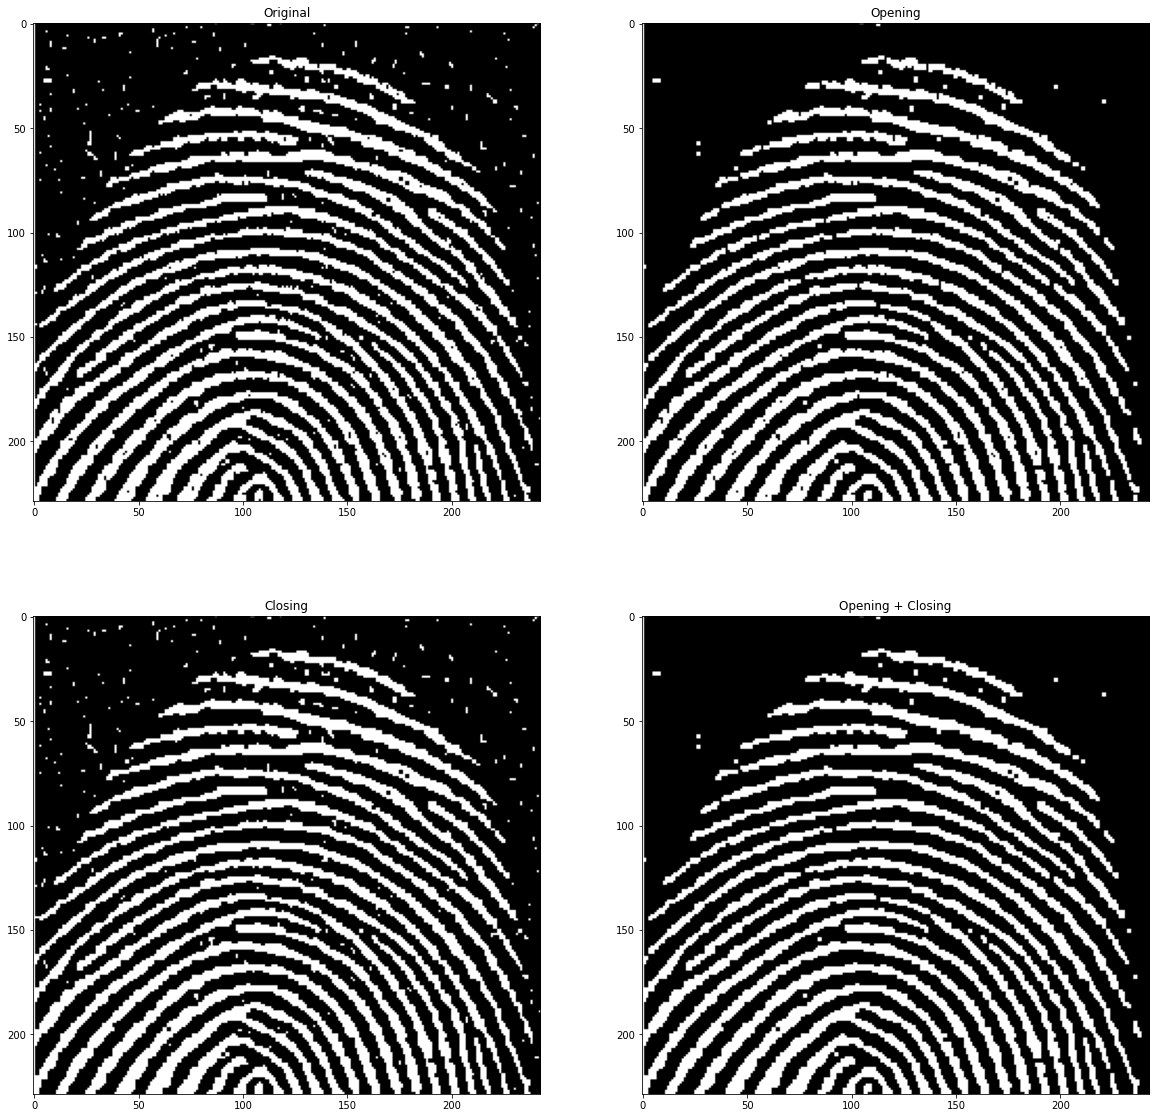

In [17]:
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/fingerprint.jpg','fingerprint.jpg')
im = rgb2gray(imread('fingerprint.jpg'))
im[im <= 0.5] = 0 # binarize
im[im > 0.5] = 1
im_o = binary_opening(im, square(2))
im_c = binary_closing(im, square(2))
im_oc = binary_closing(binary_opening(im, square(2)), square(2))
plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(im,plt.cm.gray), plt.title('Original')
plt.subplot(222), plt.imshow(im_o,plt.cm.gray), plt.title('Opening')
plt.subplot(223), plt.imshow(im_c,plt.cm.gray), plt.title('Closing')
plt.subplot(224), plt.imshow(im_oc,plt.cm.gray), plt.title('Opening + Closing')
plt.show()

In [18]:
#PCA for dimensionality reduction
import numpy as np
import pylab
import matplotlib.pylab as plt 
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

digits = load_digits() 
pca_digits=PCA(2)
digits.data_proj = pca_digits.fit_transform(digits.data)
print(pca_digits.explained_variance_)
print(pca_digits.explained_variance_ratio_)
print(pca_digits.explained_variance_ratio_.cumsum())
print(np.sum(pca_digits.explained_variance_ratio_))

[179.0069301  163.71774688]
[0.14890594 0.13618771]
[0.14890594 0.28509365]
0.2850936482369918


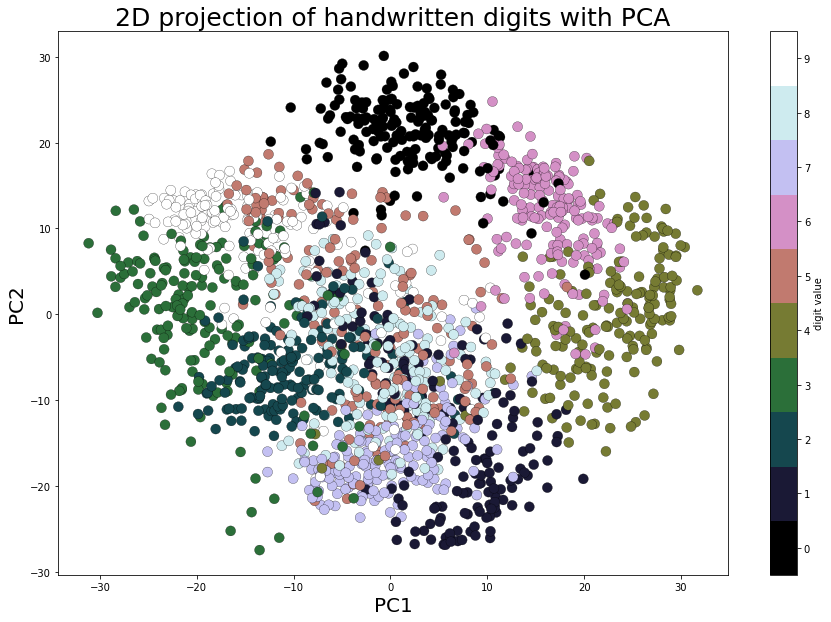

In [19]:
#Projection of digits
plt.figure(figsize=(15,10))
plt.scatter(digits.data_proj[:, 0], digits.data_proj[:, 1], lw=0.25, c=digits.target, edgecolor='k',  s=100, cmap=plt.cm.get_cmap('cubehelix', 10))
plt.xlabel('PC1', size=20), plt.ylabel('PC2', size=20), plt.title('2D projection of handwritten digits with PCA', size=25)
plt.colorbar(ticks=range(10), label='digit value')
plt.clim(-0.5, 9.5)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


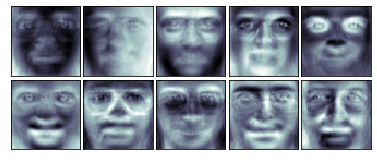

In [20]:
#Eigen faces with PCA
from sklearn.datasets import fetch_olivetti_faces 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
n_comp =64
faces = fetch_olivetti_faces().data
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_comp))])
faces_proj = pipeline.fit_transform(faces)
fig = plt.figure(figsize=(5,2)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the first 10 eigenfaces
for i in range(10): 
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pipeline.named_steps['pca'].components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

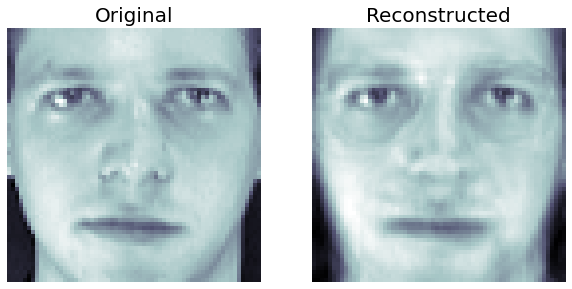

In [21]:
#Face Reconstruction
faces_inv_proj = pipeline.named_steps['pca'].inverse_transform(faces_proj)
mean_face = np.reshape(pipeline.named_steps['scaling'].mean_, (64,64))
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (64,64))
orig_face = np.reshape(faces[0,:], (64,64))
reconst_face = np.reshape(faces_proj[0,:]@pipeline.named_steps['pca'].components_, (64,64))
reconst_face = mean_face + sd_face*reconst_face
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(orig_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(122), plt.imshow(reconst_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('Reconstructed', size=20)
plt.show()